<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pandas import Series, DataFrame
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Load CSV file for " sat_scores
#sat_scores_csv = './sat_scores.csv'


NSAT =[] # intitalize for an empty list

with open('./sat_scores.csv') as afile:
    SAT = csv.reader(afile)
    for rows in SAT:
        #print rows # This show me a list of individual item
        NSAT.append(rows) # Append into a Empty list NSAT
pprint(NSAT) # proving that all elements are appended into a List


[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

In [3]:
# Answer 1.1

# Coverting datatype into dictionary

data ={} # intitalize for an empty dictionary

state =[val_state[0] for val_state in NSAT[1:]] # Using List comprehension to insert value into list
rate = [val_rate[1] for val_rate in NSAT[1:]]
verbal =[verbal_val [2] for verbal_val in NSAT[1:]]
math  = [ math_val[3] for math_val in NSAT[1:]]


data['state'] = state # insert value into a dictionary format.
data["Rate"] = rate # insert value into a dictionary format.
data['verbal'] = verbal # insert value into a dictionary format.
data['math'] = math # insert value into a dictionary format.


print data


{'state': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

In [4]:
# Trial

# Alternative method, direct insert list comprehension into the dict.
# converting data element into float (from dictionary)

data1 ={}

data1['state'] = [val_state[0] for val_state in NSAT[1:]] # Using List comprehension to insert value directly into dict
data1["Rate"] = [float(val_rate[1]) for val_rate in NSAT[1:]]
data1['verbal'] = [float(verbal_val [2]) for verbal_val in NSAT[1:]]
data1['math'] = [ float(math_val[3]) for math_val in NSAT[1:]]

print data1

# this work the same as above with less line of code

{'state': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 45.0], 'verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.0, 575.0, 593.0, 577.0, 592.0, 566.0,

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# Make a dataframe object using the SAT Dictionary

mydata = DataFrame(data)
mydata
print mydata


   Rate math state verbal
0    82  510    CT    509
1    81  513    NJ    499
2    79  515    MA    511
3    77  505    NY    495
4    72  516    NH    520
5    71  499    RI    501
6    71  499    PA    500
7    69  506    VT    511
8    69  500    ME    506
9    68  501    VA    510
10   67  499    DE    501
11   65  510    MD    508
12   65  499    NC    493
13   63  489    GA    491
14   60  501    IN    499
15   57  488    SC    486
16   56  474    DC    482
17   55  526    OR    526
18   54  499    FL    498
19   53  527    WA    527
20   53  499    TX    493
21   52  515    HI    485
22   51  510    AK    514
23   51  517    CA    498
24   34  525    AZ    523
25   33  515    NV    509
26   31  542    CO    539
27   26  439    OH    534
28   23  539    MT    539
29   18  512    WV    527
30   17  542    ID    543
31   13  553    TN    562
32   13  542    NM    551
33   12  589    IL    576
34   12  550    KY    550
35   11  545    WY    547
36   11  572    MI    561
37    9  589

In [6]:
print mydata.dtypes

Rate      object
math      object
state     object
verbal    object
dtype: object


In [7]:
# To make a Dataframe with pandas.read_CSV

SAT_data_csv = 'sat_scores.csv'
DATA = pd.read_csv(SAT_data_csv)

print DATA

   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12

In [8]:
print DATA.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
# use build in "function" lookup for the first 10 Rows

mydata.head(10)

,Rate,math,state,verbal
0,82,510,CT,509
1,81,513,NJ,499
2,79,515,MA,511
3,77,505,NY,495
4,72,516,NH,520
5,71,499,RI,501
6,71,499,PA,500
7,69,506,VT,511
8,69,500,ME,506
9,68,501,VA,510


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
DATA.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

In [11]:
DATA.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [12]:
DATA.shape

(52, 4)

In [13]:
# Hard coded information into DICT



DATADictINFO ={ "Index_ITEM" :['State','Rate','Verbal','Math'],
                "State" : 'Description of US State by abbreviation',
                "Rate" : 'Time take to complete test',
                "Verbal": ' ORAL Score',
                "Math" : 'Math Score',
                "DATA_Type" : ['Object', 'Integer','Integer','Integer'], 
                "Rows" : '52', "Columns" : '4'}

pprint(DATADictINFO)

{'Columns': '4',
 'DATA_Type': ['Object', 'Integer', 'Integer', 'Integer'],
 'Index_ITEM': ['State', 'Rate', 'Verbal', 'Math'],
 'Math': 'Math Score',
 'Rate': 'Time take to complete test',
 'Rows': '52',
 'State': 'Description of US State by abbreviation',
 'Verbal': ' ORAL Score'}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

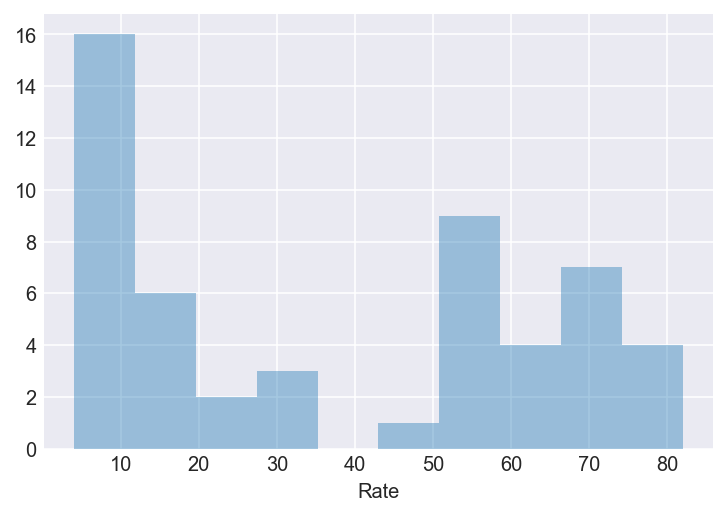

In [14]:
# Histogram for RATE

import seaborn as sns
sns.set_style('darkgrid')

sns.distplot(DATA['Rate'], bins=10 , kde=False)


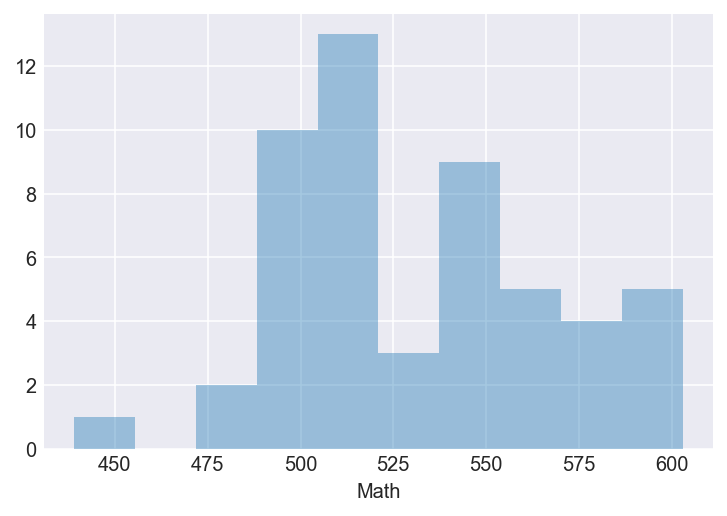

In [15]:
# Histogram for Verbal

import seaborn as sns
sns.distplot(DATA['Math'], bins=10 , kde=False)


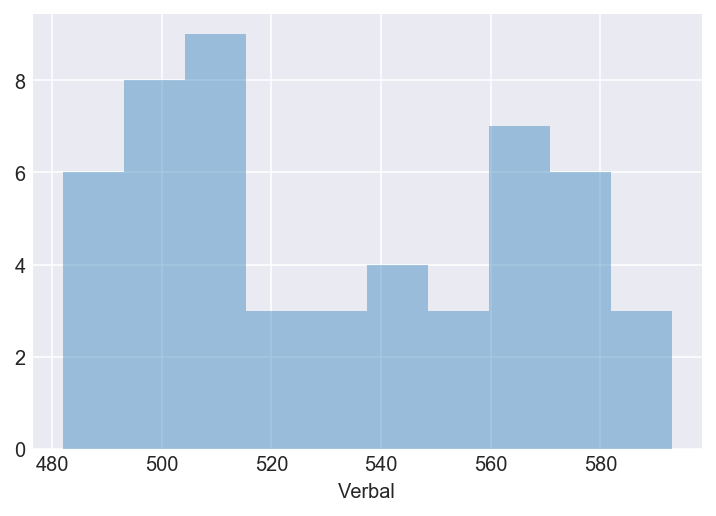

In [16]:
# Histogram for MATH

import seaborn as sns
sns.distplot(DATA['Verbal'], bins=10 , kde=False)


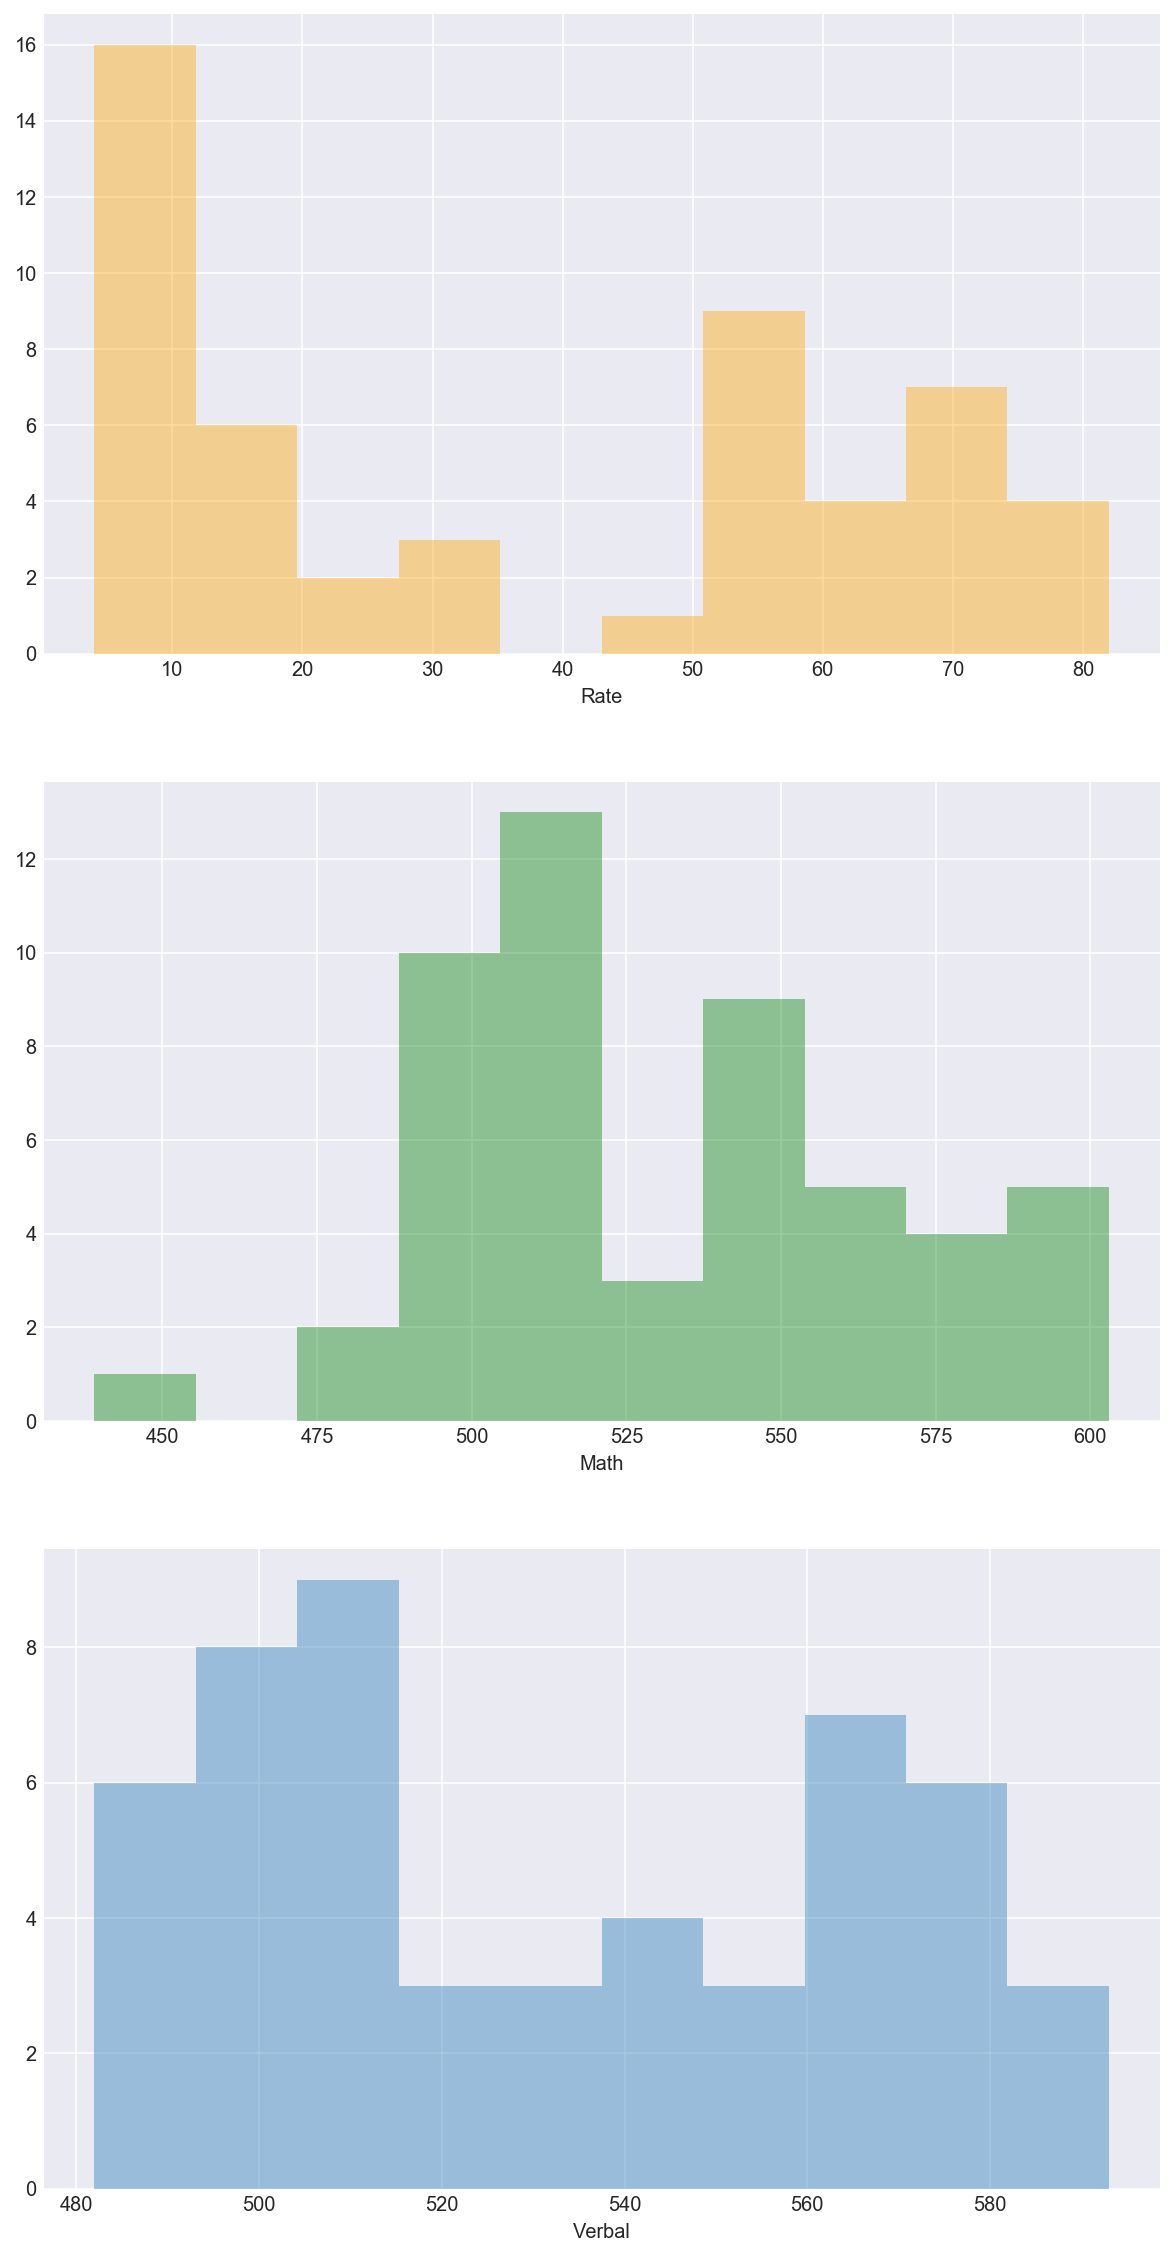

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,20))

# plot 1 for RATE
plt.subplot (3,1,1)
sns.distplot(DATA['Rate'], bins=10 , kde=False, color ="orange")

#plot 2 for MATH
plt.subplot (3,1,2)
sns.distplot(DATA['Math'], bins=10 , kde=False,color ='green')

# plot 3 for VERBAL
plt.subplot(3,1,3)
sns.distplot(DATA['Verbal'], bins=10 ,kde=False)


plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

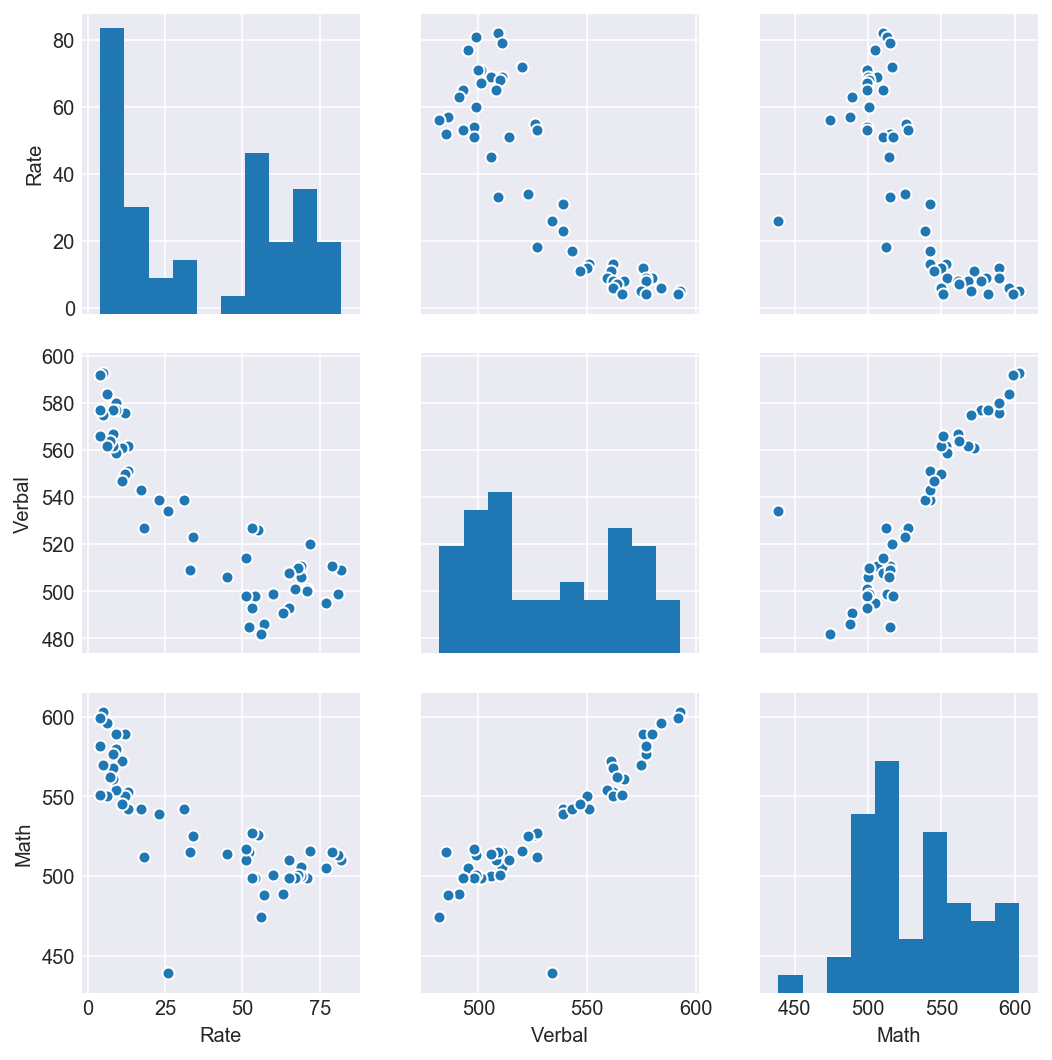

In [18]:
import seaborn as sns
sns.pairplot(DATA)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

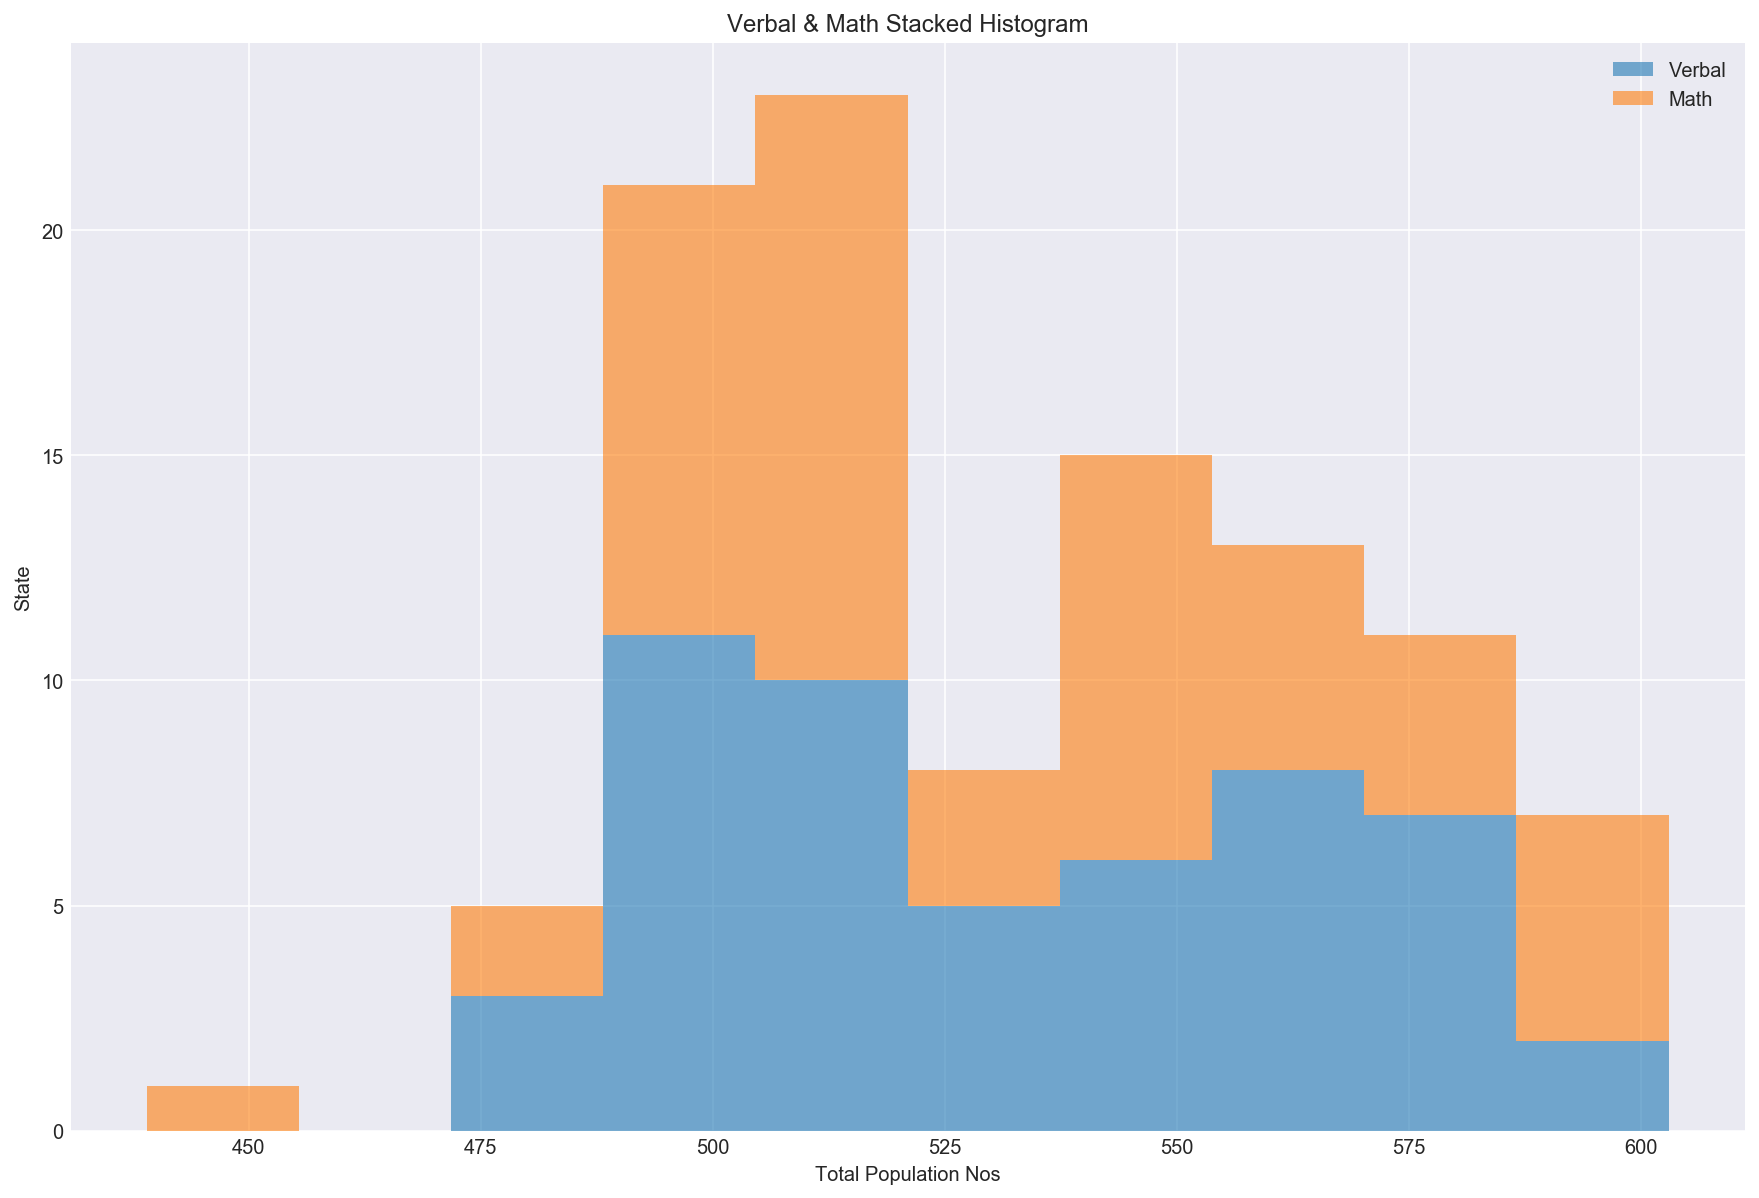

In [19]:
DD=DATA[['Verbal','Math']]

# Plotting of Histogram
DD.plot.hist(stacked=True,alpha=0.6,figsize=(15,10))

# Customization scale and label
plt.title("Verbal & Math Stacked Histogram")
plt.xlabel ("Total Population Nos")
plt.ylabel ("State")


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

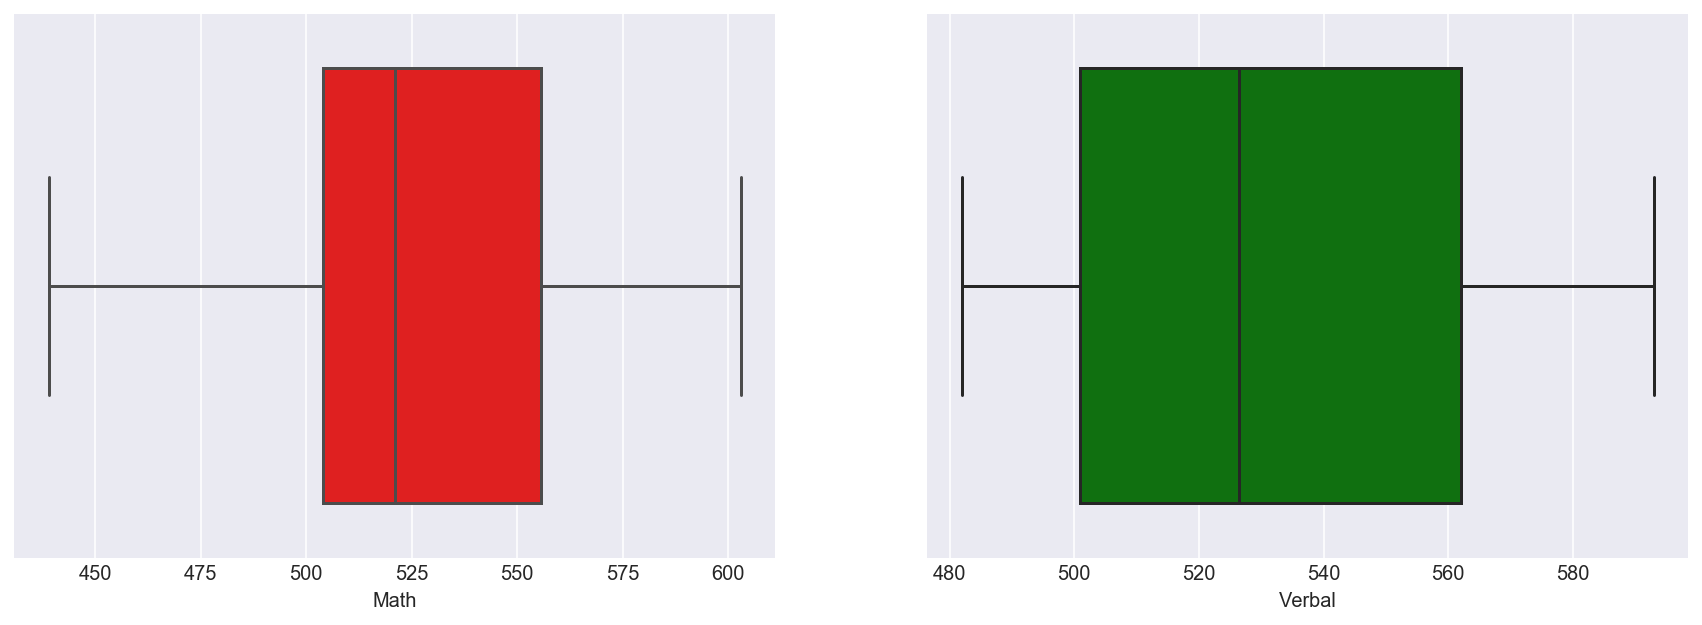

In [20]:
#plot 2 for MATH

plt.figure(figsize = (15,5))

plt.subplot (1,2,1)
sns.boxplot(DATA['Math'], color='red')

plt.subplot (1,2,2)
sns.boxplot(DATA['Verbal'], color='green')

#sns.boxplot(DD)

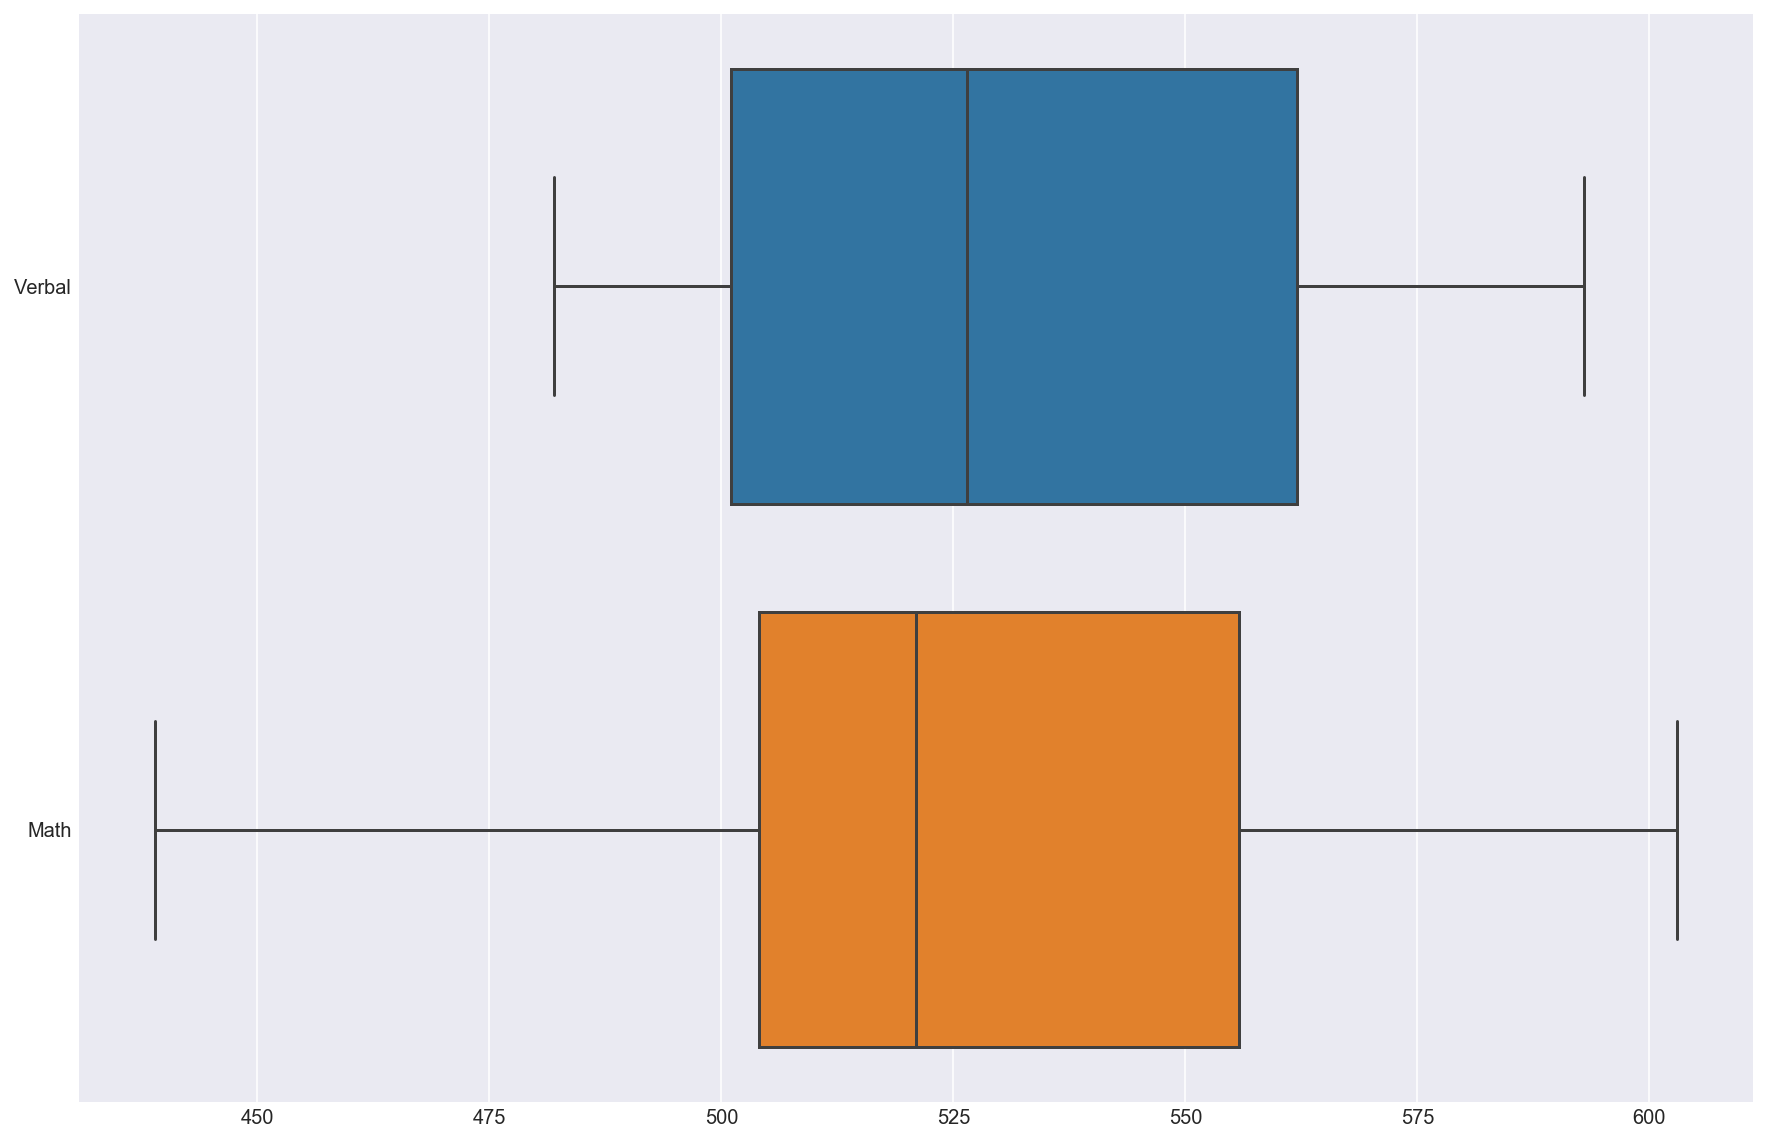

In [21]:
#sns.boxplot(a=DATA['Verbal','Math'])

plt.figure(figsize = (15,10))

data2 = DATA.drop("State", axis=1)
data3 = data2.drop("Rate", axis=1)
sns.boxplot(data=data3, orient="h")
#data2

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
DATA.mean()

Rate       37.153846
Verbal    532.019231
Math      531.500000
dtype: float64

In [23]:
# Trial 1
count = 0

for a in DATA['Verbal']:
    if a > 532:
        print a
        count=count+1# Additional step to counting for
print " Verbal Score that greater than the mean of 532 average score is ",count


539
534
539
543
562
551
576
550
547
561
580
577
559
562
567
577
564
584
562
575
593
577
592
566
 Verbal Score that greater than the mean of 532 average score is  24


In [24]:
# Trial 2 with List comprehension format_ Using Mean

z=[a for a in DATA['Verbal'] if a > 532 ] 
print z
print "Verbal Score that greater than the MEAN of 532 average score is : ",len(z)

[539, 534, 539, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]
Verbal Score that greater than the MEAN of 532 average score is :  24


In [25]:
# Answer for 5.1 # Using Masking to find results

Vmean = DATA.Verbal.mean()#
Subset=DATA[DATA['Verbal'] > Vmean].loc[: , ['State','Verbal']]

print Subset
print " Total Nos :",len(Subset)

   State  Verbal
26    CO     539
27    OH     534
28    MT     539
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566
 Total Nos : 24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [26]:
DATA.median()

Rate       33.5
Verbal    526.5
Math      521.0
dtype: float64

In [27]:
# Trial 3 with List comprehension format_ Using Median

y=[a for a in DATA['Verbal'] if a > 526.5] # list comprehension
print y
print "Verbal Score that greater than the MEDIAN of 526.5 average score is : ",len(y)

[527, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]
Verbal Score that greater than the MEDIAN of 526.5 average score is :  26


In [28]:
# Answer for 5.2 Using Masking to find results

Vmedian = DATA.Verbal.median()#
Subset=DATA[DATA['Verbal'] > Vmedian].loc[: , ['State','Verbal']]

print Subset
print " Total Nos :",len(Subset)

   State  Verbal
19    WA     527
26    CO     539
27    OH     534
28    MT     539
29    WV     527
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566
 Total Nos : 26


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [29]:
DATA

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [30]:
#### DATA_NEW = DataFrame(DATA) ### Not the right command to use when you want copy \n
####            to another memory location.

DATA_NEW = DATA.copy() # copying Dataframe to a new variabl with new memory location

# Calculate different in result
DATA_NEW["Diff_in_Result"]=DATA["Verbal"]- DATA["Math"]
DATA_NEW

#id(DATA_NEW)==id(DATA) ## Checking for result in memory location but not full-proof

,State,Rate,Verbal,Math,Diff_in_Result
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [31]:
# Trial 1 Show 10 states with greatest gap

SAT_TOP10_LG = DATA_NEW.sort_values("Diff_in_Result",ascending=False,axis=0)
SAT_TOP10_LG.reset_index(inplace=True,drop=True)
SAT_TOP10_LG = SAT_TOP10_LG.iloc[:10, :]
SAT_TOP10_LG


,State,Rate,Verbal,Math,Diff_in_Result
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15
3,AR,6,562,550,12
4,NM,13,551,542,9
5,TN,13,562,553,9
6,VA,68,510,501,9
7,DC,56,482,474,8
8,ME,69,506,500,6
9,OK,8,567,561,6


In [32]:
# Trial 2 Show 10 states with greatest gap

SAT_TOP10 = DATA_NEW.sort_values("Diff_in_Result",ascending=False,).nlargest(10,"Diff_in_Result")
SAT_TOP10 

,State,Rate,Verbal,Math,Diff_in_Result
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [33]:
# Trial 2 Show 10 states with greatest gap (Inverse)


SAT_TOP10_2_1 = DATA_NEW.sort_values("Diff_in_Result",ascending=False,).nsmallest(10,"Diff_in_Result")
SAT_TOP10_2_1 

,State,Rate,Verbal,Math,Diff_in_Result
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


In [34]:
# Answer to 5.4.1

SAT_TOP10 = DATA_NEW.sort_values("Diff_in_Result",ascending=False)
SAT_TOP10=SAT_TOP10.reset_index().iloc[:3, :]
SAT_TOP10


,index,State,Rate,Verbal,Math,Diff_in_Result
0,27,OH,26,534,439,95
1,50,MS,4,566,551,15
2,29,WV,18,527,512,15


In [35]:
# Answer to 5.4.2

SAT_TOP10_2 = DATA_NEW.sort_values("Diff_in_Result") # Need not to include ascending = True becoz of Default setting
SAT_TOP10_2=SAT_TOP10_2.reset_index().iloc[:10, :]
SAT_TOP10_2.head(3)

,index,State,Rate,Verbal,Math,Diff_in_Result
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [36]:
# Using Pandas function to find correlation matrix

DATA.corr()

# Negative correlated

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [37]:
DATA.describe()
# Count is the referring total nos of rows
# Mean is the avg of indivdual column "RATE", "VERBAL" & "MATH"
# Std is the Standard Deviation of indivdual column "RATE", "VERBAL" & "MATH"
# Min score value
# value @ the lower limit 25% region (lower qualtile)
# Median _ value @ 50 percentile region (mid qualtile)
# value @ the upper limit 75% region (upper qualtile)
# Max Score value

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [38]:
"""
Trial 1
pct_under = boston.pct_underclass.values
med_val = boston.home_median_value.values

under_val_cov = np.sum((pct_under - np.mean(pct_under))*(med_val - np.mean(med_val)))/len(pct_under)
print under_val_cov
print np.cov(pct_under, med_val, bias=True)

"""

'\nTrial 1\npct_under = boston.pct_underclass.values\nmed_val = boston.home_median_value.values\n\nunder_val_cov = np.sum((pct_under - np.mean(pct_under))*(med_val - np.mean(med_val)))/len(pct_under)\nprint under_val_cov\nprint np.cov(pct_under, med_val, bias=True)\n\n'

In [39]:
# Answer to 6.3 Calculating for Convariance Matrix 

DATA.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [40]:
# Loading file into pandas

Druguse_data_by_age_csv = 'drug-use-by-age.csv'
Drugdata = pd.read_csv(Druguse_data_by_age_csv)
#print type(Drugdata)

DDBASE=DataFrame(Drugdata)
DDBASE.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [46]:
DDBASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [47]:
DDBASE.shape

(17, 28)

In [48]:
DDBASE.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [49]:
# Cleanup of DataFrame

def clean_up(series):
    return series.map(lambda x: np.float(0) if x == '-' else x)

clean_up_table = DDBASE.apply(clean_up,axis=1)
clean_up_table.iloc[:,2:] = clean_up_table.iloc[:,2:].astype(float)
clean_up_table.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [57]:
clean_up_table.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

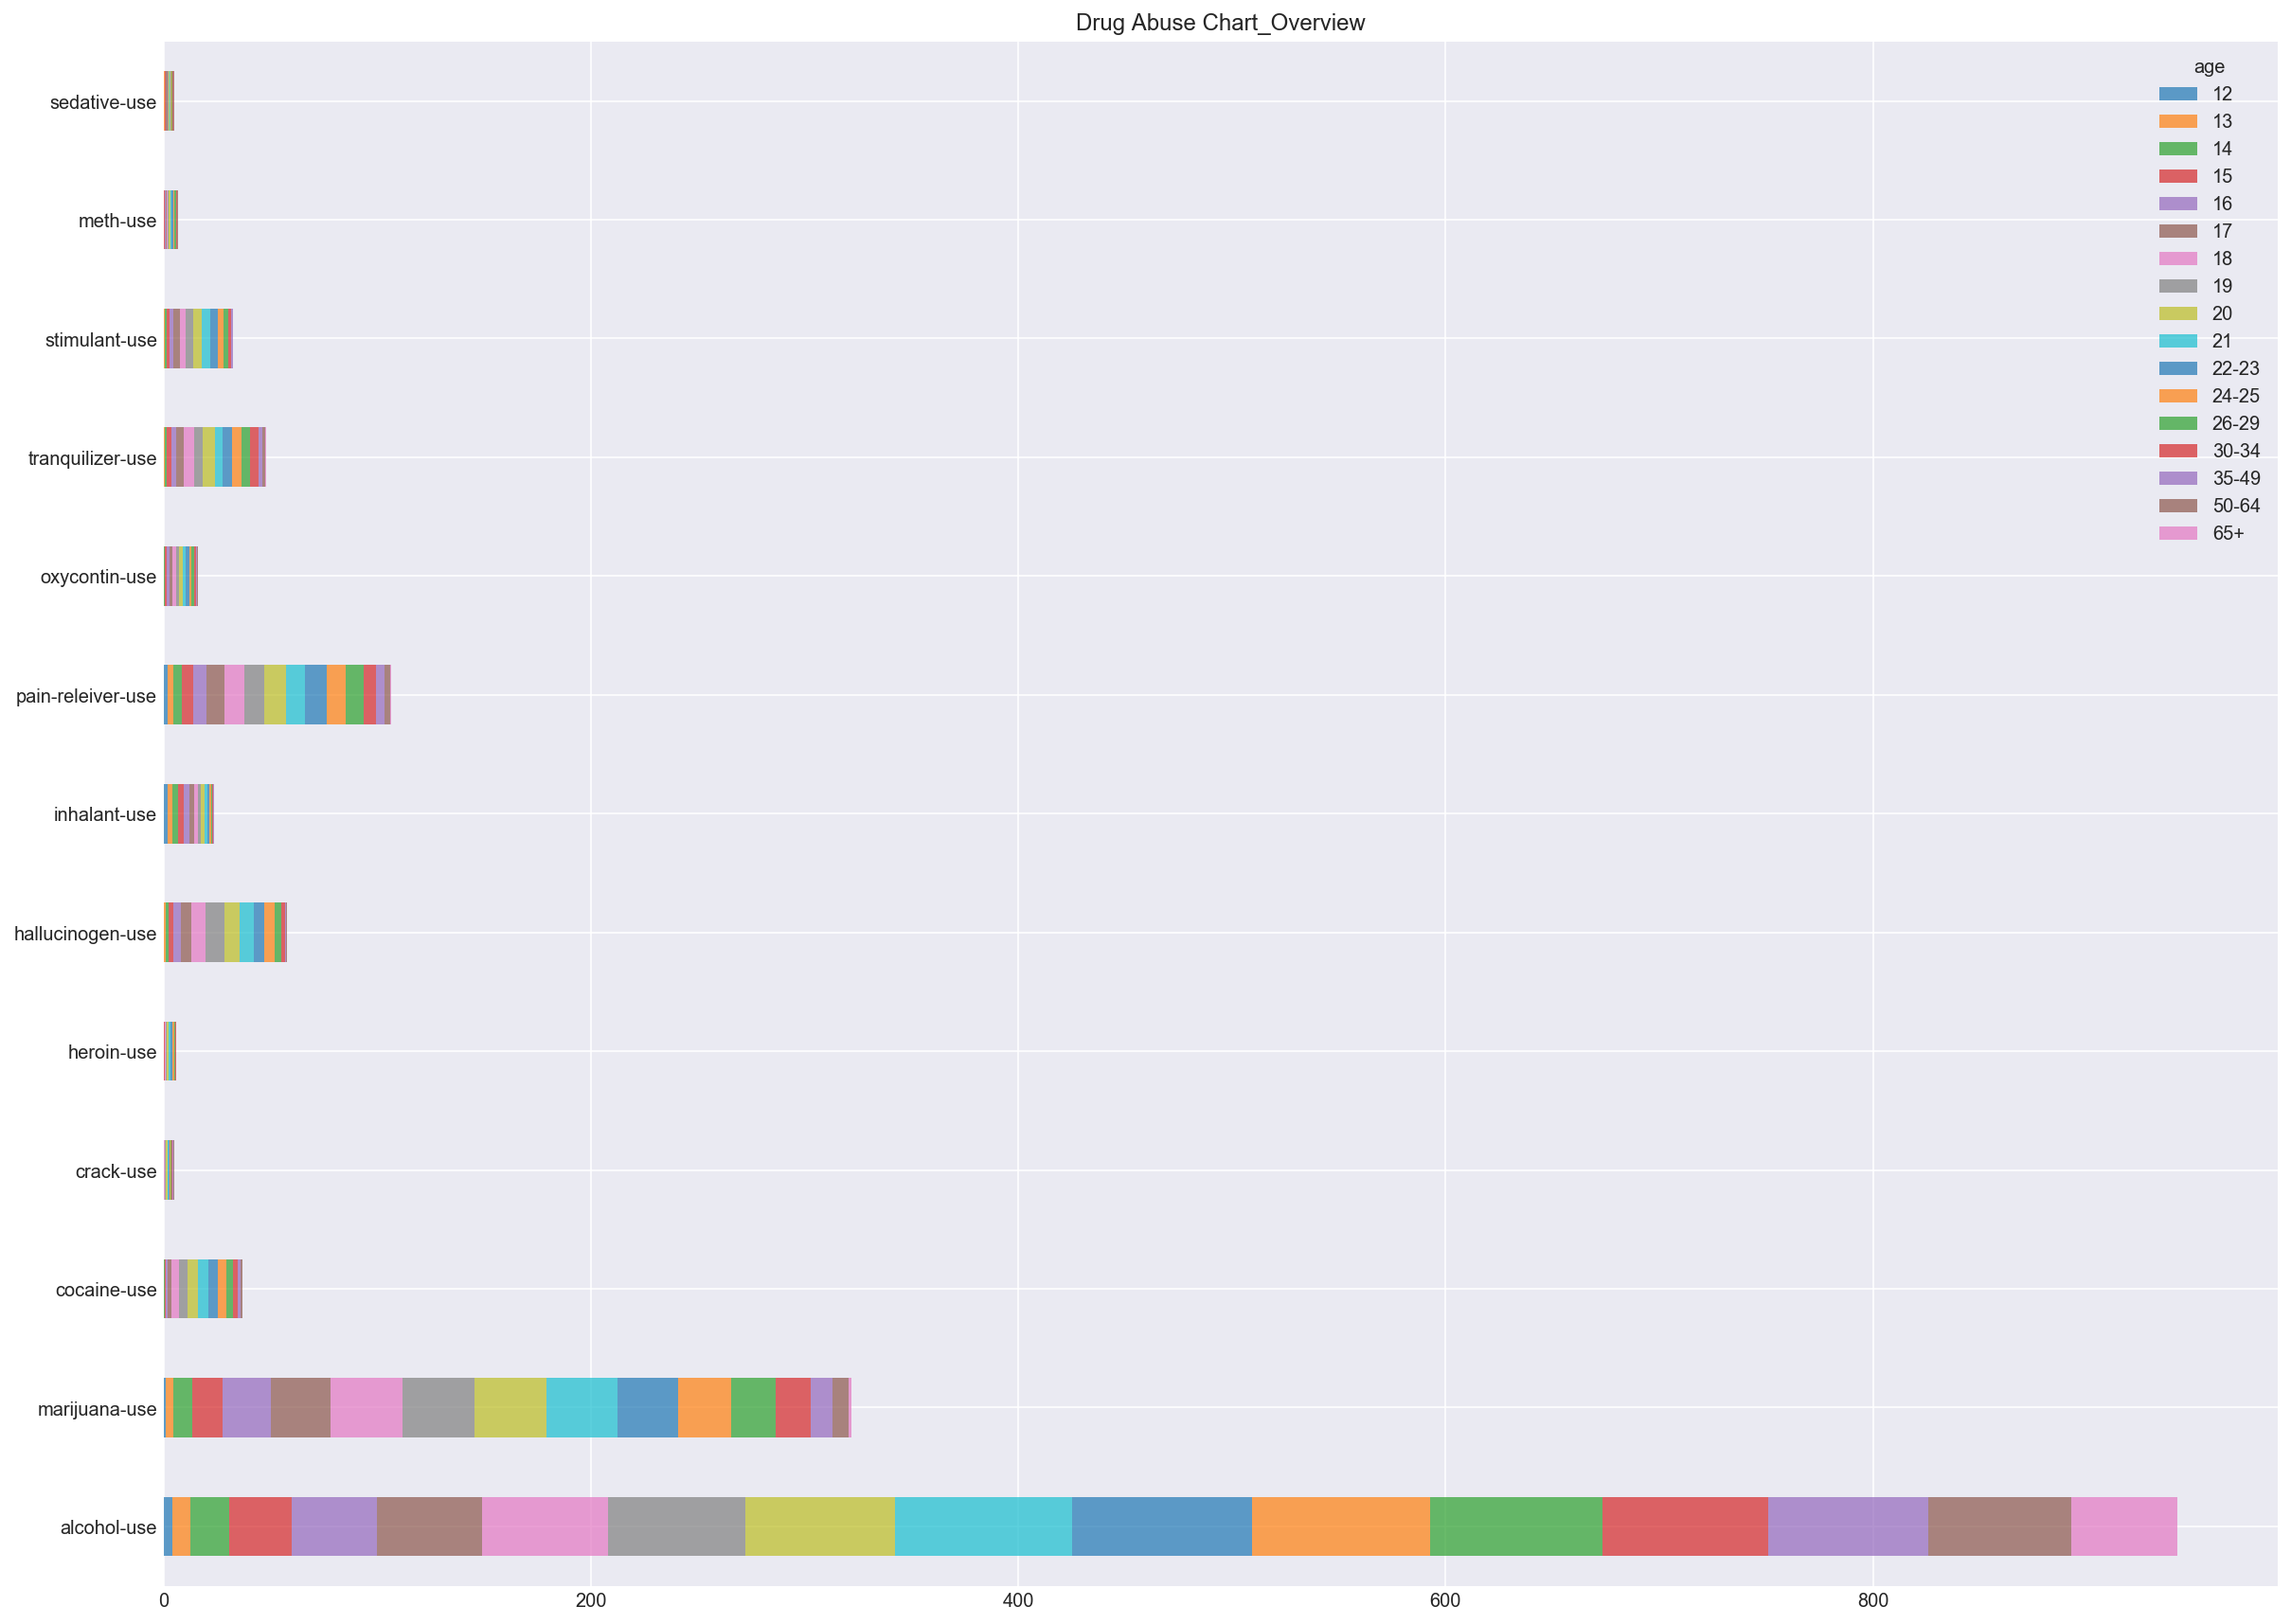

In [54]:
# Overview Graph _Drug Abuse Chart

df_trans = convert_drug_USE.transpose()
df_trans.plot(alpha=0.7,figsize=(20,15),kind="barh",title ="Drug Abuse Chart_Overview",grid=True,stacked=True)

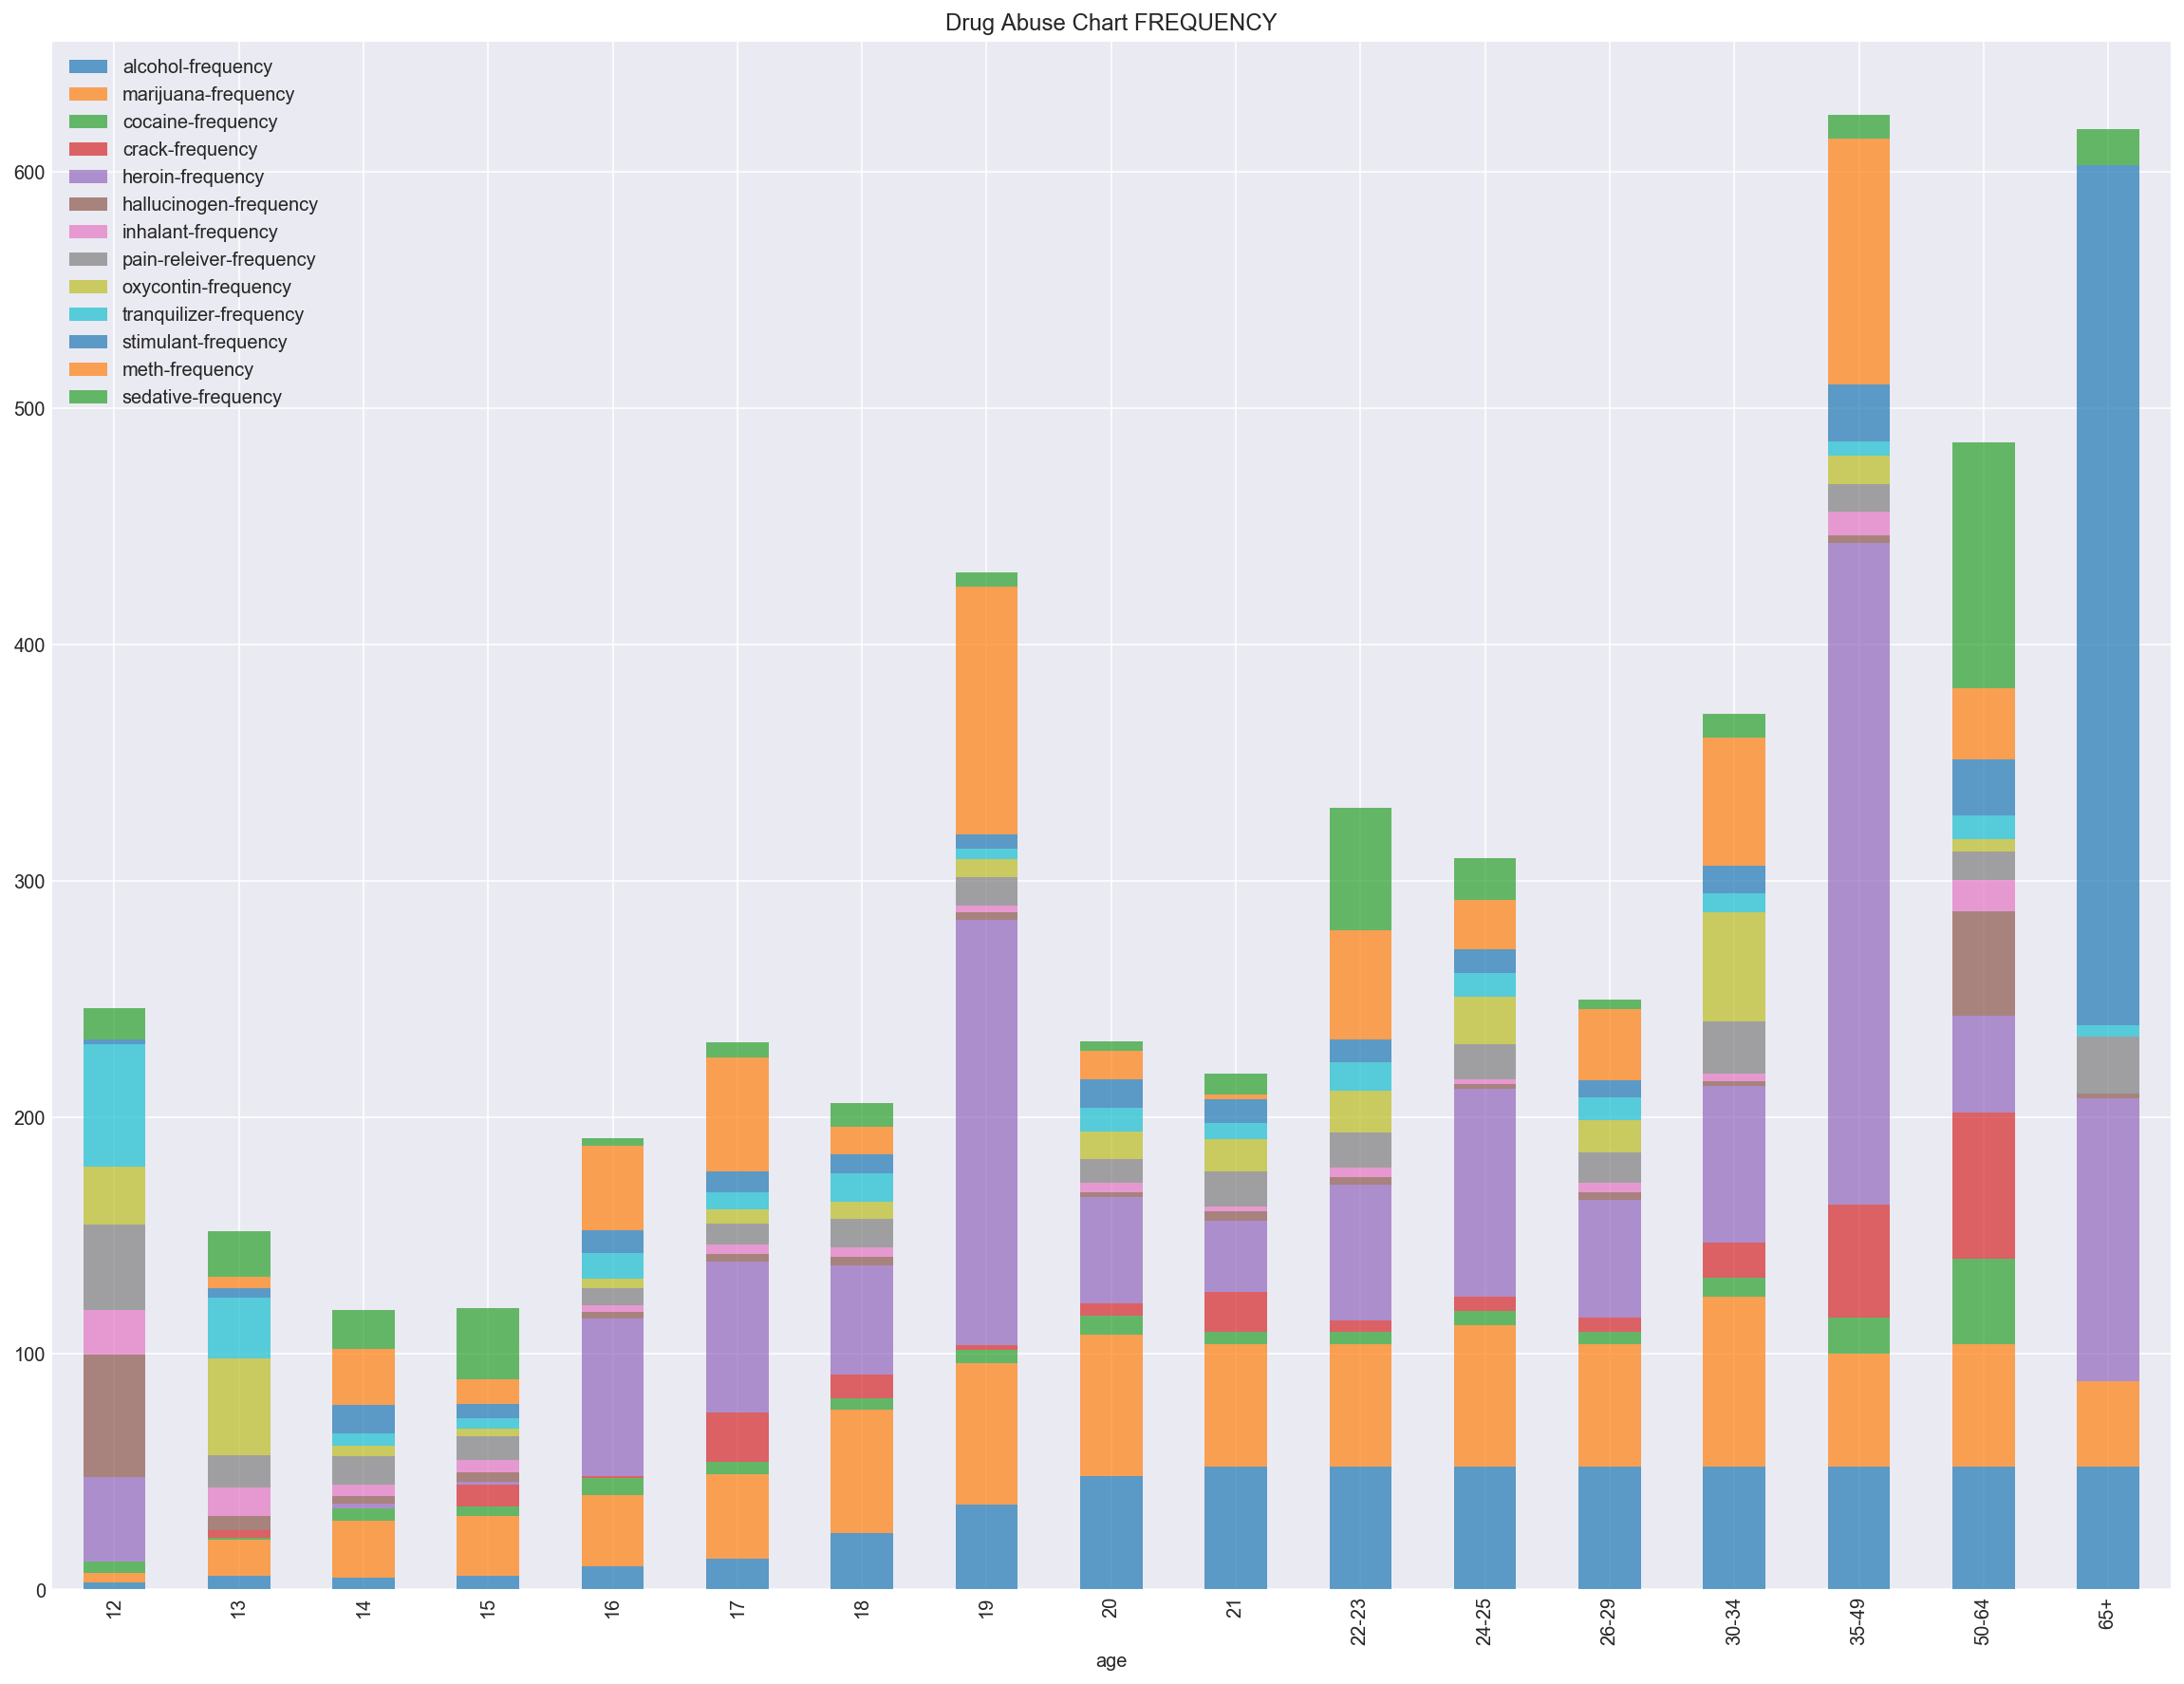

In [51]:
# Drug Frequency Table

col_name_drug1 = clean_up_table.columns.tolist()
convert_drug_FREQ = clean_up_table.drop('n', axis=1) # Drop "n" from col
convert_drug_FREQ = convert_drug_FREQ.drop(col_name_drug1[2::2], axis=1)# Conversion of Database
convert_drug_FREQ
convert_drug_FREQ.set_index('age',inplace=True)

#Plotting of Graph ( FRRQUENCY Vs Age)

convert_drug_FREQ.plot(alpha=0.7,figsize=(20,15),kind="bar",title ="Drug Abuse Chart FREQUENCY",grid=True,stacked=True)

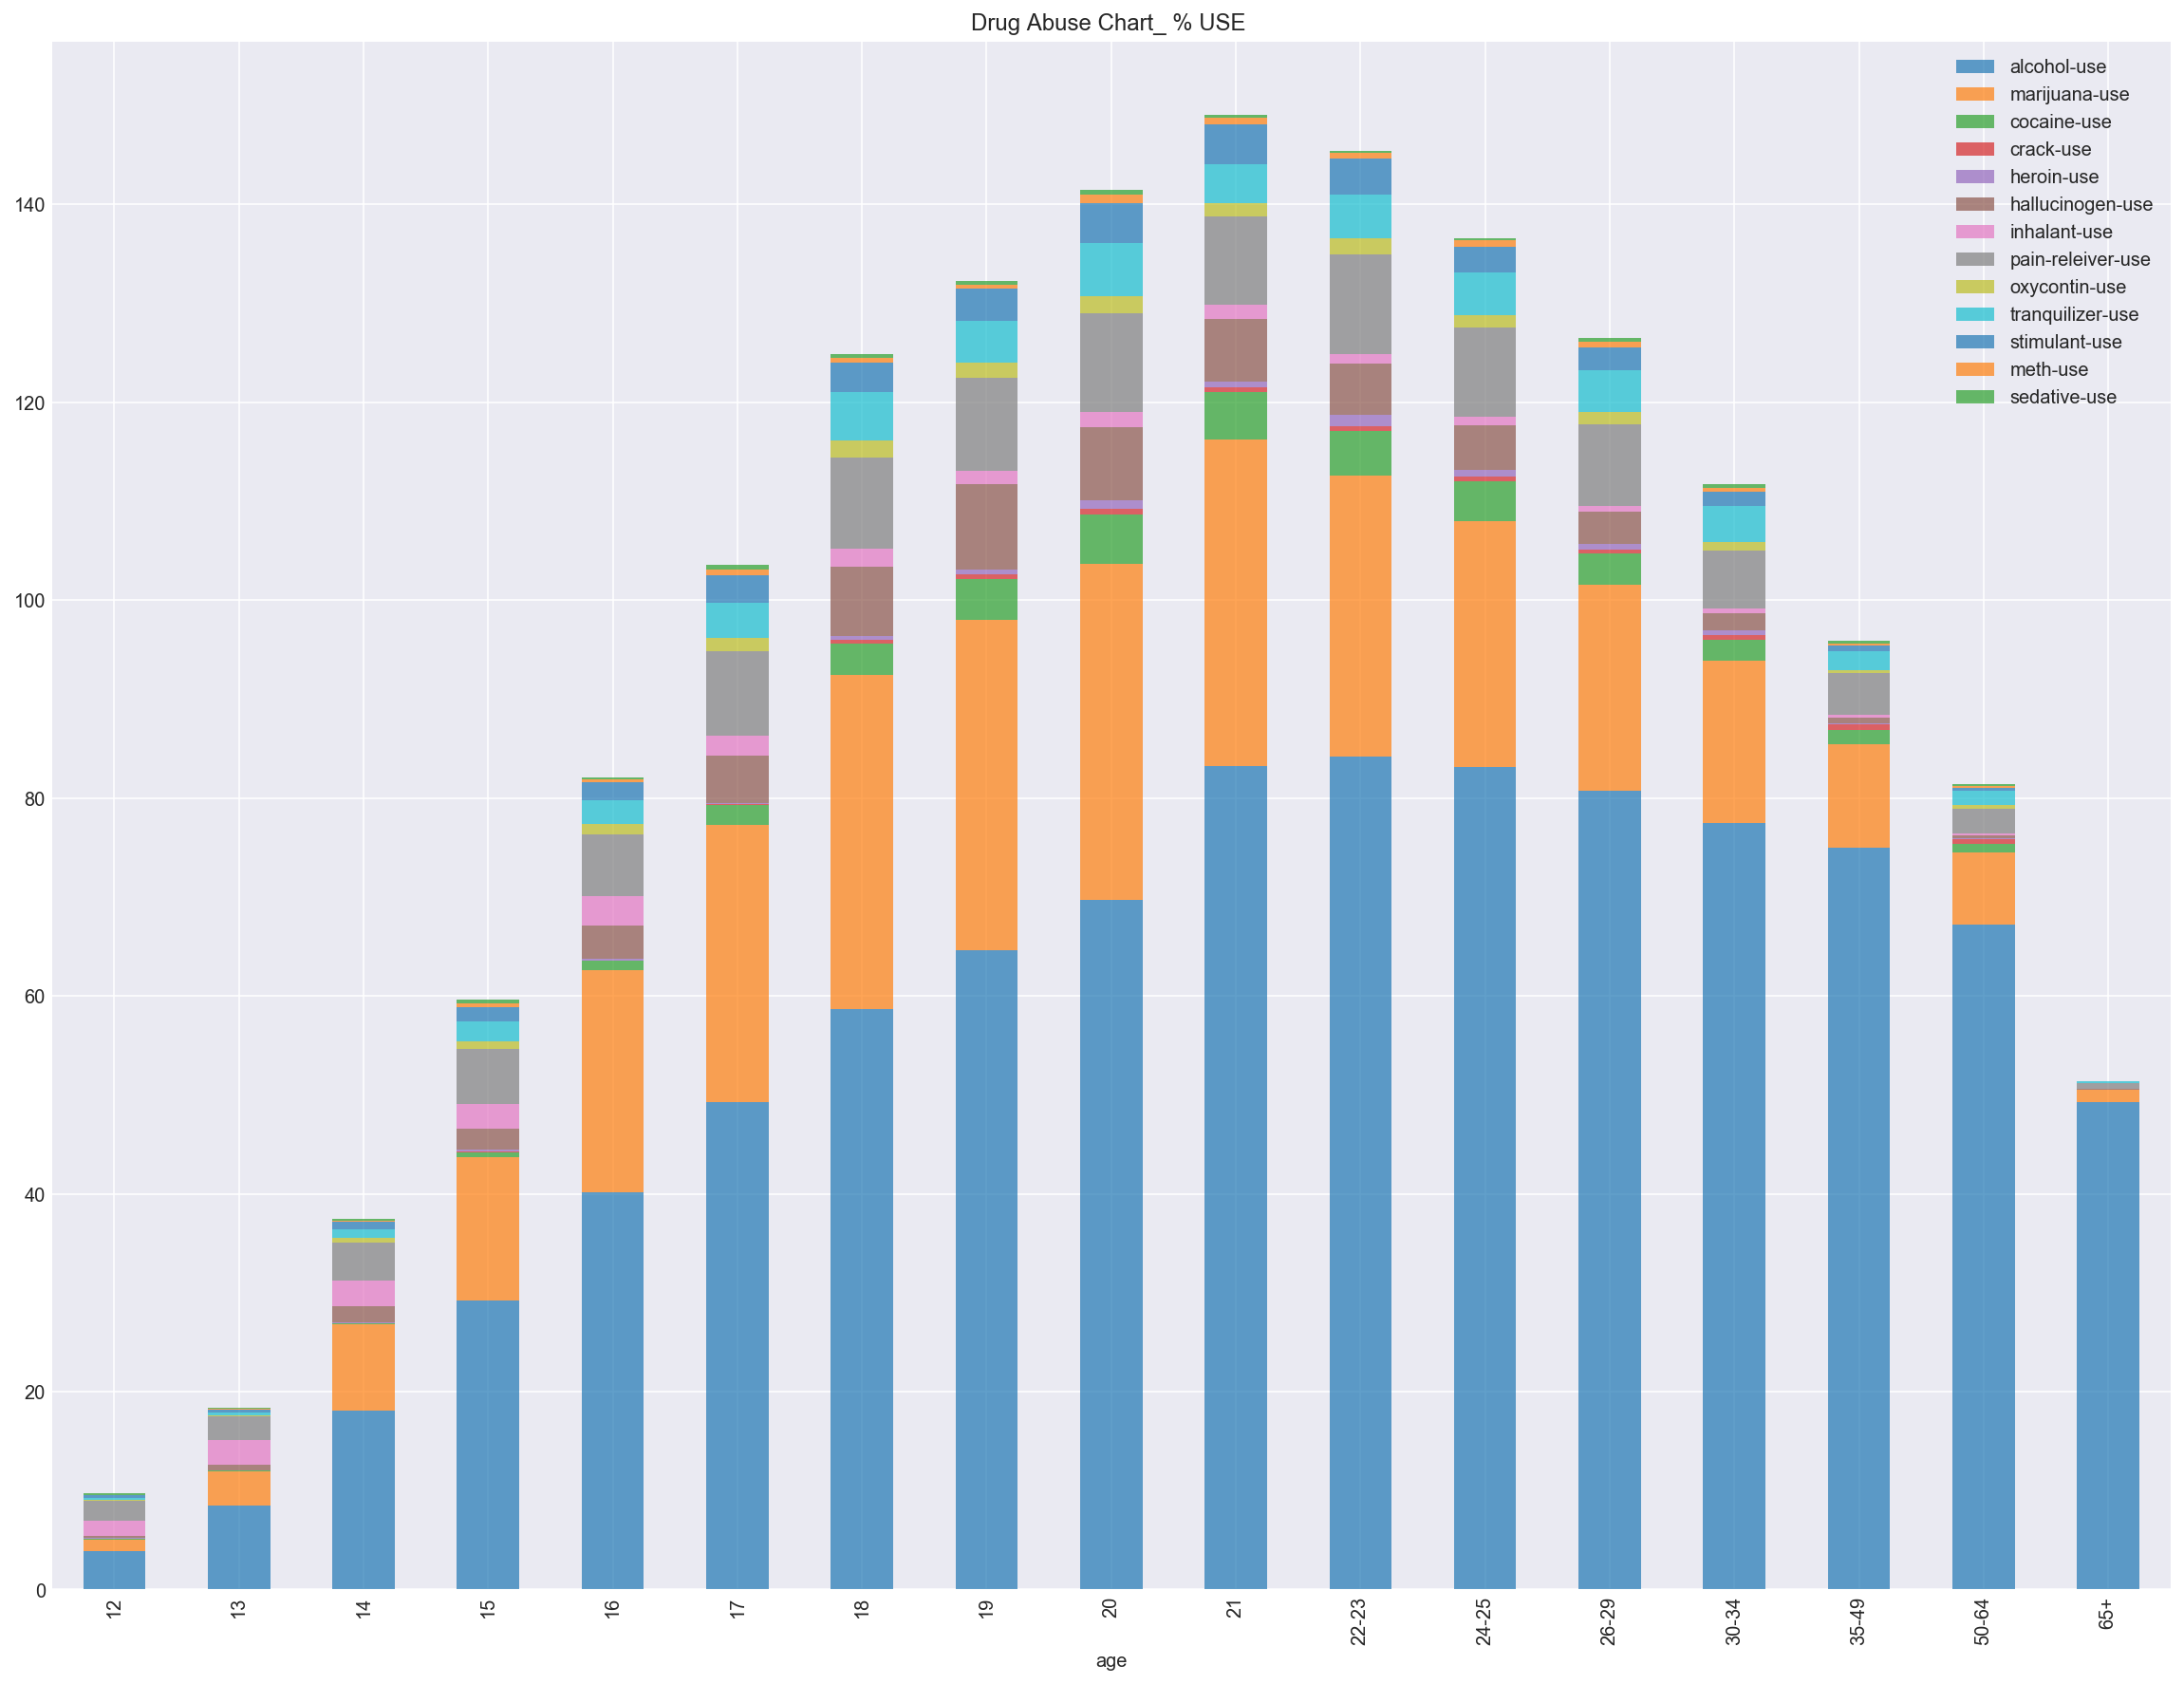

In [52]:
# Drug Usage Table

col_name_drug2 = clean_up_table.columns.tolist()
convert_drug_USE = clean_up_table.drop(col_name_drug2 [1::2], axis=1)
convert_drug_USE.set_index("age",inplace=True)

#Plotting of Graph ( Total Vs Age)
convert_drug_USE.plot(alpha=0.7,figsize=(20,15),kind="bar",title ="Drug Abuse Chart_ % USE ",grid=True,stacked=True)

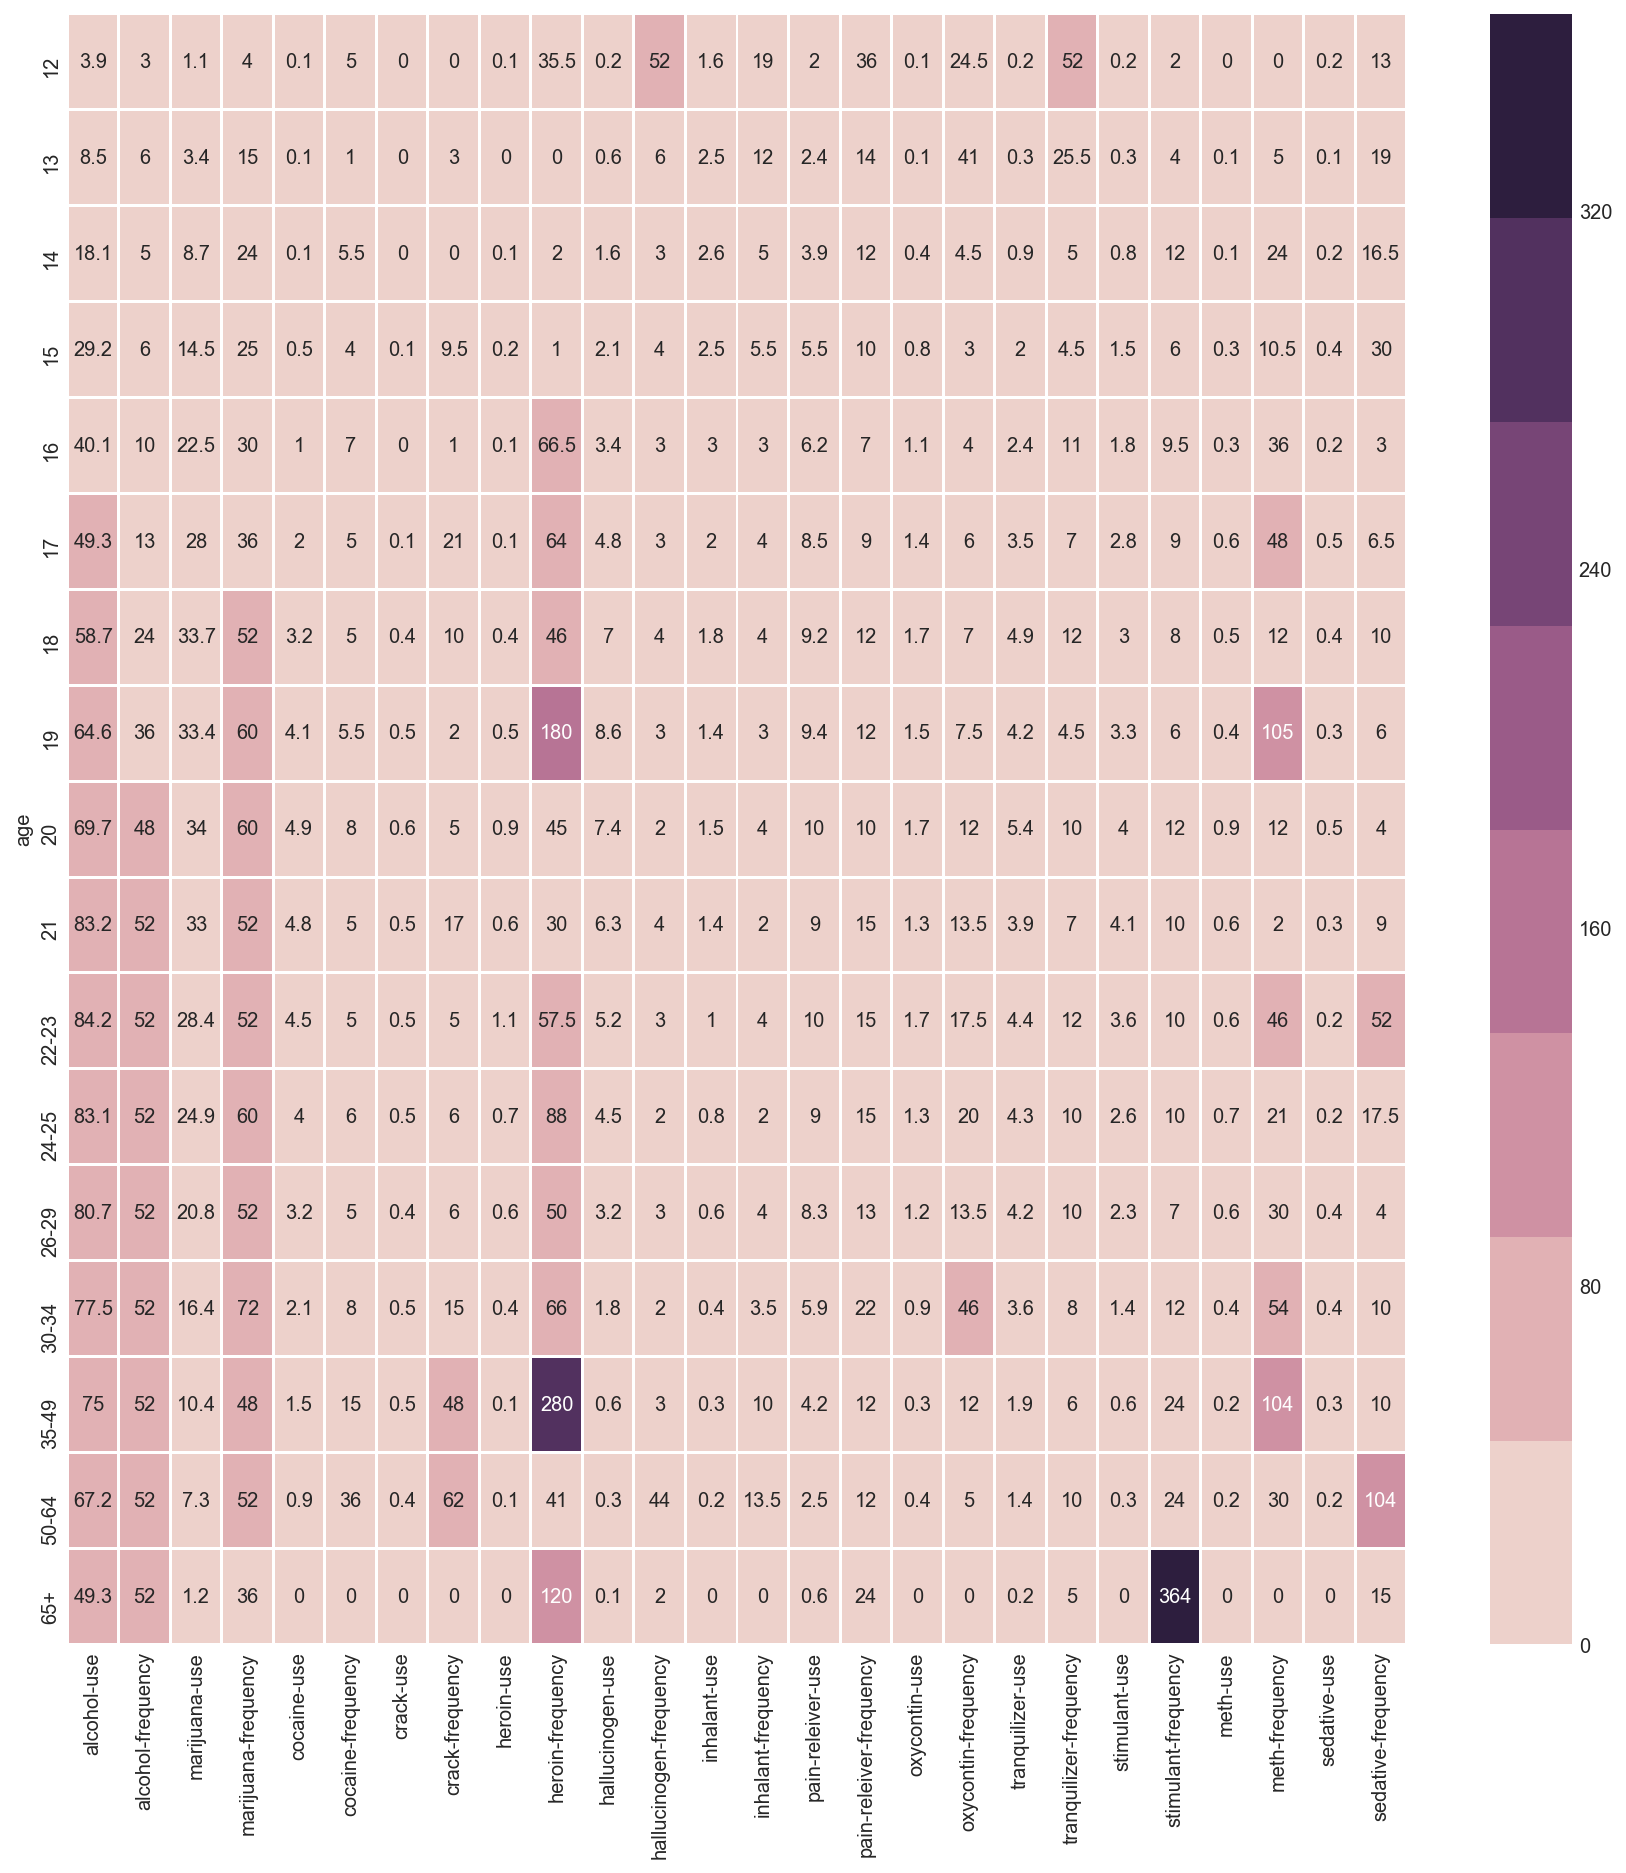

In [60]:
# Create HeatMap 

x = clean_up_table.set_index("age")
x = x.drop("n",axis=1)
plt.subplots(figsize=(15,15))
sns.heatmap(x,annot=True,cmap= sns.cubehelix_palette(8),linewidths=1, linecolor='white',fmt='.4g',)

In [55]:
clean_up_table.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


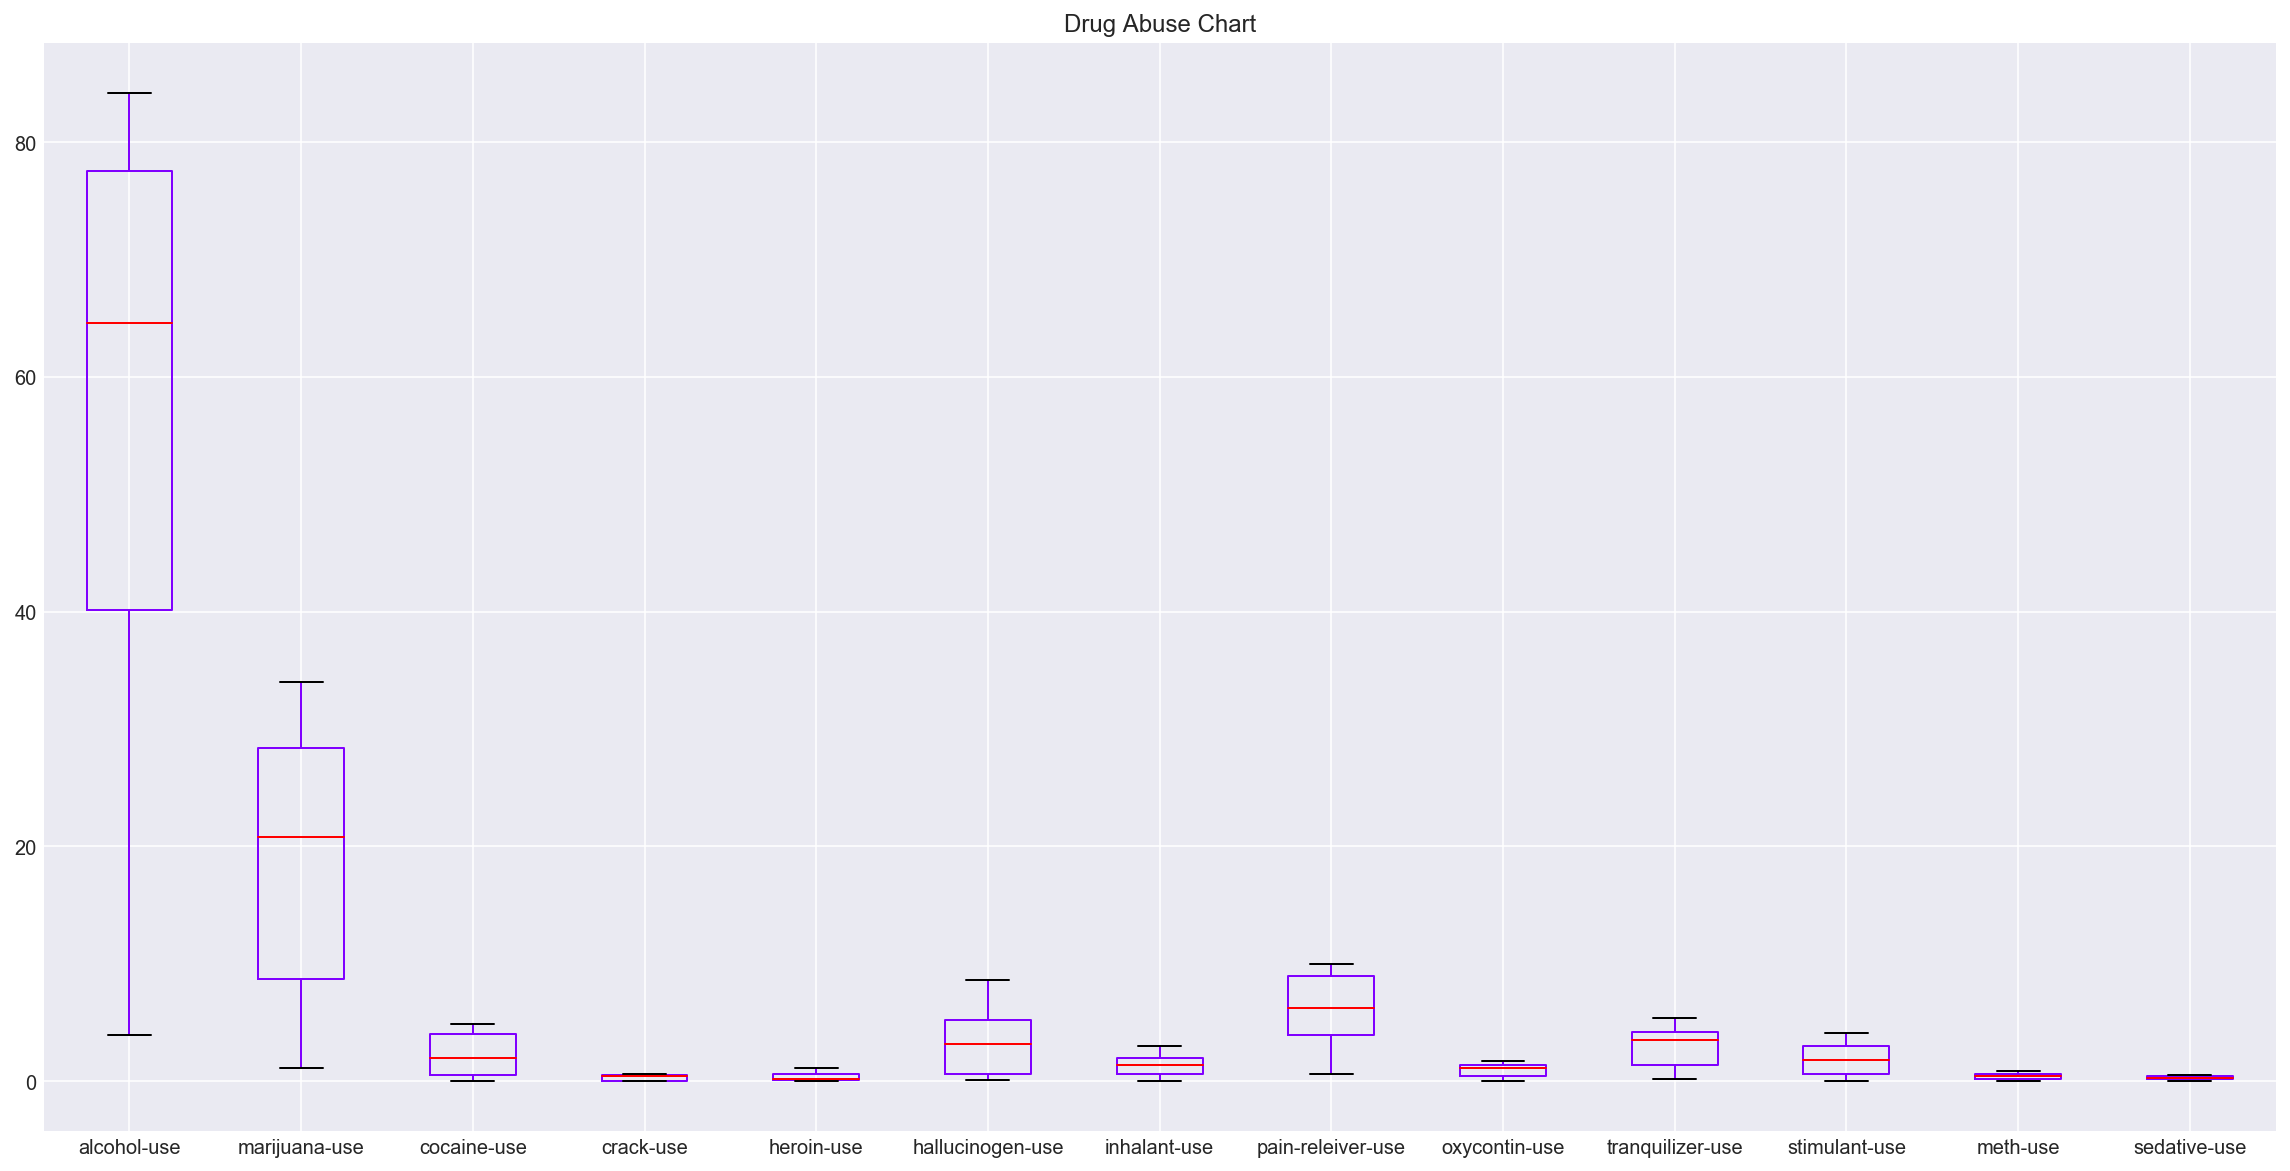

In [56]:
convert_drug_USE.plot(figsize=(20,10),kind="box",title ="Drug Abuse Chart",grid=True,colormap="rainbow")

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [61]:
Rate_VAR=DATA[['Rate']]
type(Rate_VAR)

pandas.core.frame.DataFrame

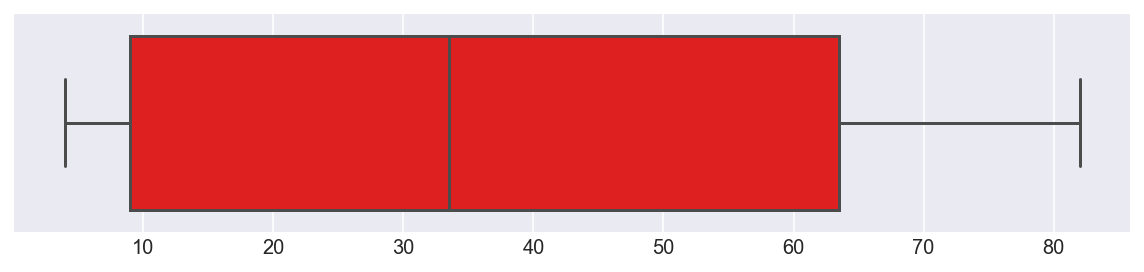

In [62]:
# Plot boxplot to see Outliers

plt.figure(figsize = (10,2))
sns.boxplot(Rate_VAR, color='red')


In [63]:
Outlier = Rate_VAR[(Rate_VAR-Rate_VAR.mean())>=3*Rate_VAR.std()]
Outlier.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 1 columns):
Rate    0 non-null float64
dtypes: float64(1)
memory usage: 488.0 bytes


In [64]:
#Trial for Outliers on Math

Outlier2 = DATA[np.abs(DATA['Math']-DATA['Math'].mean())>=2*DATA['Math'].std()]
Outlier2

,State,Rate,Verbal,Math
27,OH,26,534,439


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [65]:
DATA.corr(method="spearman")

,Rate,Verbal,Math
Rate,1.000000,-0.833294,-0.813275
Verbal,-0.833294,1.000000,0.905205
Math,-0.813275,0.905205,1.000000


In [66]:
DATA.corr(method="pearson")

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [67]:
DATA_NEW2 = DATA.copy()

In [68]:
# Calculate different in result
DATA_NEW2["Percentile"]=DATA_NEW2.Rate.rank(pct=True)*100
DATA_NEW2

,State,Rate,Verbal,Math,Percentile
0,CT,82,509,510,100.000000
1,NJ,81,499,513,98.076923
2,MA,79,511,515,96.153846
3,NY,77,495,505,94.230769
4,NH,72,520,516,92.307692
5,RI,71,501,499,89.423077
6,PA,71,500,499,89.423077
7,VT,69,511,506,85.576923
8,ME,69,506,500,85.576923
9,VA,68,510,501,82.692308


In [69]:
DATA_NEW2[DATA_NEW2['State']=="CA"]

,State,Rate,Verbal,Math,Percentile
23,CA,51,498,517,56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

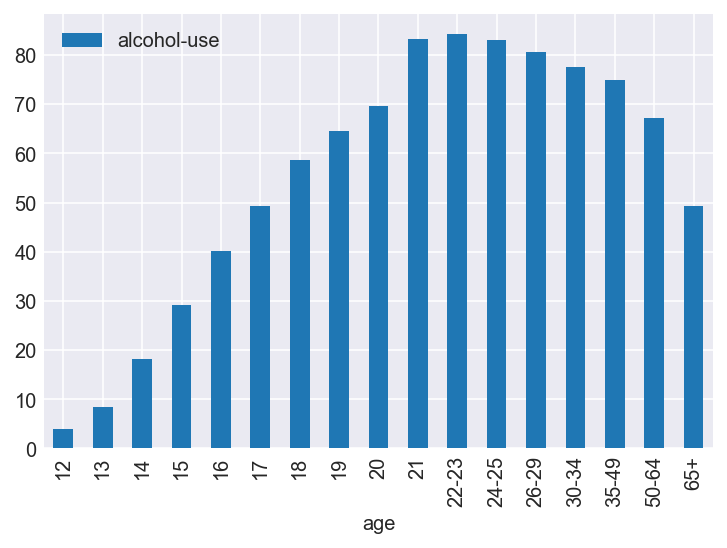

In [70]:
DDBASE.plot.bar(x="age",y="alcohol-use")